# Lab 10

## Problem 1

Neural networks can be used to classify galaxies.

a) Load the data you need to train and test the galNet network presented in the lecture.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as image
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

2024-01-09 12:00:46.559417: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 12:00:46.559445: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 12:00:46.559461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 12:00:46.564056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
testGalaxies = np.load('/home/nnds1b/lab/lab_10/galaxies/testGalaxies.npy')
testLabels = np.load('/home/nnds1b/lab/lab_10/galaxies/testLabels.npy')
trainGalaxies = np.load('/home/nnds1b/lab/lab_10/galaxies/trainGalaxies.npy')
trainLabels = np.load('/home/nnds1b/lab/lab_10/galaxies/trainLabels.npy')

b) Train your network for up to 50 epochs and use the history object it returns to create a plot of its performance as a function of the number of epochs.

In [4]:
imgSize = 128
galNet = keras.Sequential([
    keras.layers.Conv2D(96, (6, 6), activation='relu', input_shape=(imgSize,imgSize,3)), # During the training process, filter(s) that are optimal for the extraction of the features will be determined
    keras.layers.MaxPooling2D(pool_size=(3,3)), # Maxpooling means we're only considering the strongest features (the feature maps with stronger features)
    keras.layers.Flatten(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

galNet.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

galNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 96)      10464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 41, 41, 96)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 161376)            0         
                                                                 
 dense (Dense)               (None, 24)                3873048   
                                                                 
 dense_1 (Dense)             (None, 3)                 75        
                                                                 
Total params: 3883587 (14.81 MB)
Trainable params: 3883587 (14.81 MB)
Non-trainable params: 0 (0.00 Byte)
________________

2024-01-09 12:00:47.857900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-09 12:00:47.861215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-09 12:00:47.861349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
history = galNet.fit(trainGalaxies, trainLabels, validation_data=(testGalaxies, testLabels), epochs=50)

Epoch 1/50


2024-01-09 12:00:48.667173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8900
2024-01-09 12:00:48.745562: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-09 12:00:48.877916: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-09 12:00:48.963312: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fed50062ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-09 12:00:48.963337: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-01-09 12:00:48.969600: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-09 12:00:49.087720: I ./tensorflow/compiler/jit/device_comp

30/30 [==============================] - 2s 24ms/step - loss: 1.0888 - accuracy: 0.5246 - val_loss: 1.0643 - val_accuracy: 0.5042
Epoch 2/50
30/30 [==============================] - 0s 10ms/step - loss: 0.9532 - accuracy: 0.5393 - val_loss: 0.8896 - val_accuracy: 0.5042
Epoch 3/50
30/30 [==============================] - 0s 10ms/step - loss: 0.8273 - accuracy: 0.5696 - val_loss: 0.8101 - val_accuracy: 0.7647
Epoch 4/50
30/30 [==============================] - 0s 10ms/step - loss: 0.7322 - accuracy: 0.7319 - val_loss: 0.6995 - val_accuracy: 0.7311
Epoch 5/50
30/30 [==============================] - 0s 10ms/step - loss: 0.6571 - accuracy: 0.7613 - val_loss: 0.6296 - val_accuracy: 0.7731
Epoch 6/50
30/30 [==============================] - 0s 10ms/step - loss: 0.5471 - accuracy: 0.8199 - val_loss: 0.5912 - val_accuracy: 0.8151
Epoch 7/50
30/30 [==============================] - 0s 10ms/step - loss: 0.5022 - accuracy: 0.8346 - val_loss: 0.5472 - val_accuracy: 0.8319
Epoch 8/50
30/30 [======

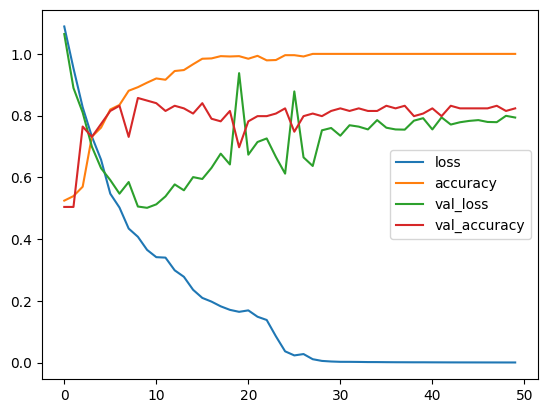

In [6]:
for key in history.history.keys():
    plt.plot(history.history[key], label=key)

plt.legend()
plt.show()

c) What’s the per-class performance of your network, i.e. the number of ellipticals, spirals and irregulars it classified correctly? Compare that with the distribution of training and test images. Furthermore, browse through the training images and discuss potential issues that have a negative effect on the training efficiency.

In [7]:
def confusion_matrix(model, test_data, test_labels, descriptors):
    predictions = model.predict(test_data)
    predicted_labels = np.array( [np.argmax( vec ) for vec in predictions] )
    conf_matrix = tf.math.confusion_matrix(test_labels,predicted_labels)
    conf_matrix_np = conf_matrix.numpy()

    # Visualization using Seaborn's heatmap
    sns.heatmap(conf_matrix_np, annot=True, fmt='d', cmap='Blues',
                xticklabels=descriptors, yticklabels=descriptors)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

4/4 [==============================] - 0s 3ms/step


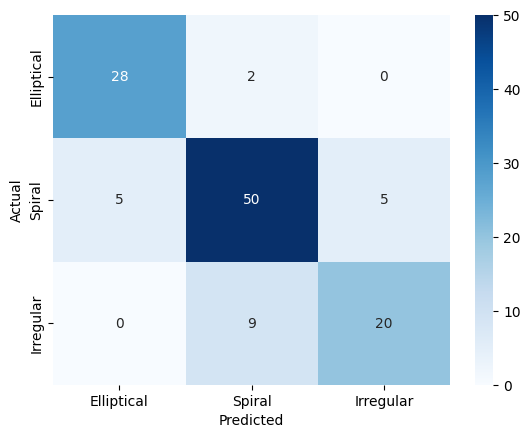

In [8]:
confusion_matrix(galNet, testGalaxies, testLabels, ['Elliptical', 'Spiral', 'Irregular'])

d) Explain which kinds of image augmentation, i.e. simple image manipulations such as rotations, flips or shifts, could be applied to pictures of galaxies.

All of them make sense, as it would allow the model to learn unseen variations, and galaxies can appear in the sky at any rotation, with its arms to the left or right, with different shapes, etc.

## Problem 2

On the last problem sheet, the optional task revolved around a greyscale version of the famous CIFAR-10 dataset. Now that we learned to deal with convolutional and pooling layers, we are ready to tackle the color version.
a) Use
```
(trainImages ,trainLabels) ,(testImages ,testLabels) = keras.datasets.cifar10.load_data ()
```
to load the dataset. Make sure the pixels are normalized.

In [9]:
(trainImages ,trainLabels) ,(testImages ,testLabels) = keras.datasets.cifar10.load_data ()

trainImages, testImages = trainImages/255, testImages/255

(array([ 41., 129., 282., 372., 266., 376., 333., 280., 361., 221., 119.,
         85.,  71.,  63.,  47.,  26.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <BarContainer object of 16 artists>)

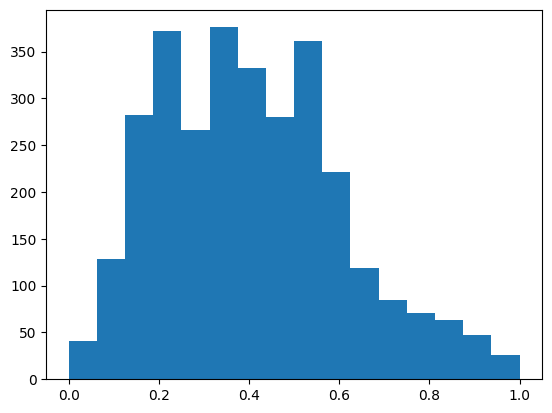

In [10]:
plt.hist(trainImages[0].flatten(), 16)

In [11]:
del imgSize

In [12]:
imgSize = trainImages[0].shape[0]

b) Create a network with the following architecture:

– A convolutional layer with 32 filters, a (3,3) kernel and relu activation

– A max-pooling layer with (2,2) binning

– A convolutional layer with 64 filters, a (3,3) kernel and relu activation

– A max-pooling layer with (2,2) binning

– A flattening layer

– A dense layer with 64 nodes and relu activation

– A softmaxed output layer

In [13]:
cifarNet = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(imgSize,imgSize,3)), 
    keras.layers.MaxPooling2D(pool_size=(2,2)), 
    keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(pool_size=(2,2)), 
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

c) Compile and train your network for up to 20 epochs.

In [14]:
cifarNet.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cifarNet.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7fee801b3460>>

In [15]:
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.cifar10.load_data()
images_train, images_test = images_train / 255.0, images_test / 255.0

In [16]:
cifarNetHistory = cifarNet.fit(images_train, labels_train, validation_data=(images_test, labels_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 3ms/step - loss: 1.4849 - accuracy: 0.4662 - val_loss: 1.2248 - val_accuracy: 0.5773
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1361 - accuracy: 0.6007 - val_loss: 1.0773 - val_accuracy: 0.6211
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9974 - accuracy: 0.6520 - val_loss: 1.0023 - val_accuracy: 0.6494
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9114 - accuracy: 0.6840 - val_loss: 0.9441 - val_accuracy: 0.6761
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8473 - accuracy: 0.7062 - val_loss: 0.9797 - val_accuracy: 0.6667
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7901 - accuracy: 0.7260 - val_loss: 0.9533 - val_accuracy: 0.6721
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7418 - accuracy: 0.7403 - val_loss: 0.9047 - val_accuracy:

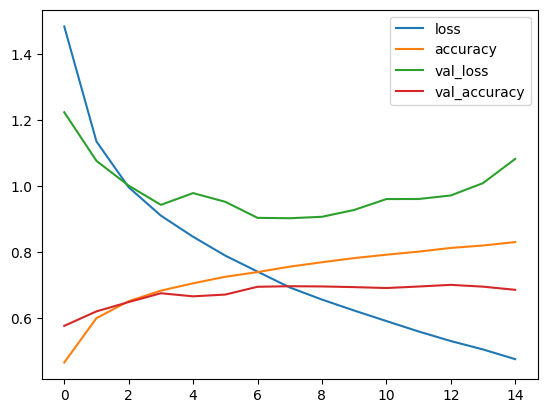

In [17]:
for key in cifarNetHistory.history.keys():
    plt.plot(cifarNetHistory.history[key], label=key)

plt.legend()
plt.show()

313/313 [==============================] - 0s 1ms/step


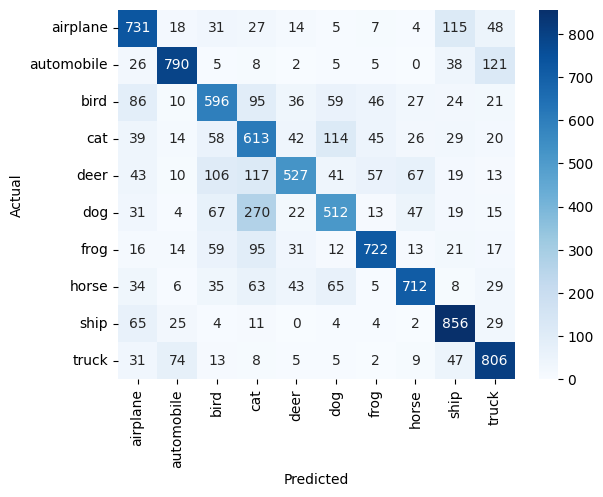

In [18]:
class_names = []

with open('/mnt/share/nnds/cifar10bw/classNames.txt', 'r') as file:
    class_names = file.read().splitlines()

confusion_matrix(cifarNet, images_test, labels_test, class_names)

In [19]:
cifarNet.save('cifarNet.h5')

/home/nnds1b/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


d) Explain which kinds of image augmentation could be applied to this dataset

## Problem 3